<a href="https://colab.research.google.com/github/Praxis-QR/PythonForManagers/blob/main/ChatGPT_Retail_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

# Analysis of Retail Sales Data
In this Colab Notebook, we demonstrate the usage of basic Pandas functions to explore data in a relative large dataset available with [Kaggle](https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset?resource=download)<br>

This is  [Exercise # 1](https://pymanager.blogspot.com/p/superstore-sales-analysis.html) used in the textbook [Python for Business Managers](https://pymanager.blogspot.com/p/welcome.html).


In [1]:
#
# The first step is to import the all-important pandas module
#
import pandas as pd                               #
pd.to_datetime("today").strftime("%d %B %Y")      # get today's date and format it as required
                                                  # other formats https://www.geeksforgeeks.org/python-strftime-function/

'02 March 2024'

# Data Acquisition

In [2]:
#
# the data is available in both CSV format as well as XLSX format
# prior conversion to XLSX format, if possible, makes the analysis easier because Excel handles many of the data conversion from string to date etc
# however, we will demonstrate the usage of the CSV format because it is more likely to be found in real world situation
#
dataURL1 = 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/SuperStoreSalesKaggle.zip'   # zipped CSV file
dataURL2 = 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/KaggleRetailSales.xlsx'      # xlsx file
df = pd.read_csv(dataURL1)                              # Pandas can read a zipped, CSV file from a remote location
#df = pd.read_excel(dataURL2)                             # Can also read the corresponding excel file .xlsx
df.shape                                           # Each row in this dataset represents data about ONE sale transaction

(51290, 21)

In [3]:
df.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011


In [4]:
df.tail(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [ ]:
#ReqdCols = ['order_id', 'customer_name']
#df[ReqdCols].head(3)


#First Look at Data

In [5]:
#How many rows, columns
df.shape

(51290, 21)

In [6]:
#
#Create a list of all columns
#
allColumns = list(df.columns)
print(allColumns)

['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment', 'state', 'country', 'market', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority', 'year']


In [7]:
#
# Drop two columns, order_id is irrelevant, customer_name for privacy, anonymysing issues
#
dropColumns = ['order_id',  'customer_name']
df.drop(dropColumns, axis=1, inplace= True)
df.shape

(51290, 19)

In [8]:
#is there any missing value? In this case, not
df.count()

order_date        51290
ship_date         51290
ship_mode         51290
segment           51290
state             51290
country           51290
market            51290
region            51290
product_id        51290
category          51290
sub_category      51290
product_name      51290
sales             51290
quantity          51290
discount          51290
profit            51290
shipping_cost     51290
order_priority    51290
year              51290
dtype: int64

In [9]:
#
# what are the different datatypes?
# sales should be float64 but is object or string. Why? Because it has commas embedded in it
# also date is treated as string
# this problem may not occur if the original data is in Excel format
#
df.dtypes

order_date         object
ship_date          object
ship_mode          object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

##Data Cleaning

In [10]:
#
# df.sales has been automatically interpreted as string because of the presence of commma,
# so replace comma and convert to numeric
#

df['sales'] = df['sales'].str.replace(',', '')    # replace , with blank
df['sales'] = pd.to_numeric(df['sales'])          # convert column "a" of a DataFrame
#df.sales

In [11]:
#
# what is the first and last order date ?
# we have four years of data, but date format changes ...
df['order_date'].describe
#df['ship_date'].describe

<bound method NDFrame.describe of 0          1/1/2011
1          1/1/2011
2          1/1/2011
3          1/1/2011
4          1/1/2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: order_date, Length: 51290, dtype: object>

In [12]:
# Some of the dates are string like dd/mm/yyyy while others are dd-mm-yyyy
# this will cause problems in converting string to real dates
# So we move all dd-mm-yyyy to dd/mm/yyyy -- could have been the other way round also
#
df['order_date'] = df['order_date'].str.replace('-','/')
df['ship_date'] = df['ship_date'].str.replace('-','/')

In [13]:
# convert all dates to dd/mm/yyyy format
#
#df['ship_date'] = pd.to_datetime(df['ship_date']).dt.strftime('%d/%m/%Y')
#df['order_date'] = pd.to_datetime(df['order_date']).dt.strftime('%d/%m/%Y')
#
df['ship_date'] = pd.to_datetime(df['ship_date'],format='%d/%m/%Y')
df['order_date'] = pd.to_datetime(df['order_date'],format='%d/%m/%Y')
#df['order_date'].describe

In [14]:
#Finally, let us see the datatypes
df.dtypes

order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                      int64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [16]:
df.to_csv('retail2.csv', sep=',', index=False, encoding='utf-8')

Good morning! Of course, I'd be happy to help. Please provide me with the first few lines of the CSV file, and I'll show you the different kinds of charts you can generate using Python's pandas library. <br>
User
plt.show() gave an error. how do i fix it?<br>


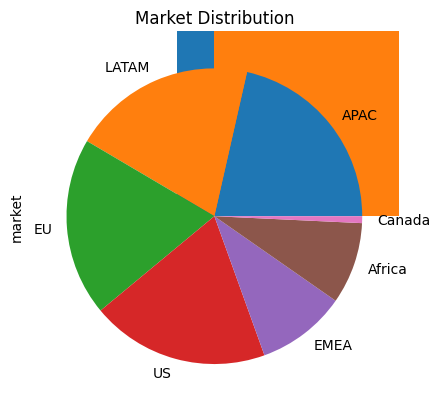

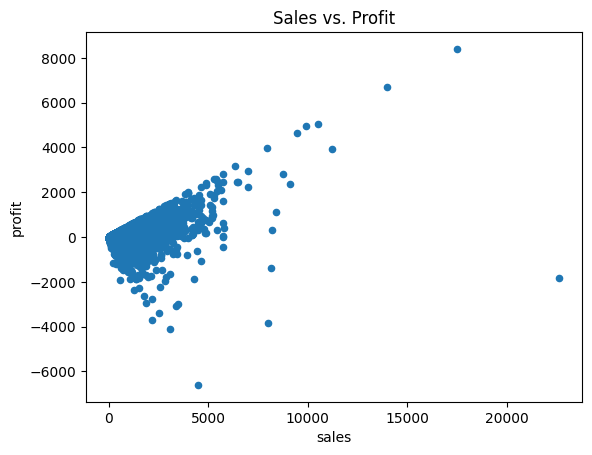

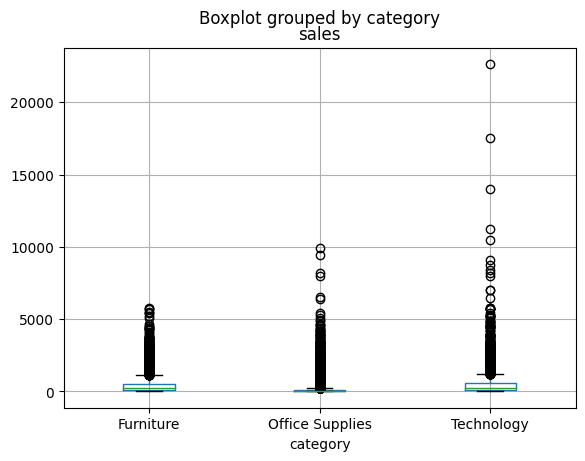

In [18]:
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib's pyplot module

# Load the CSV data into a pandas DataFrame
#df = pd.read_csv("your_file.csv")

# Display the first few rows of the DataFrame
#print(df.head())

# Now, let's demonstrate some basic charts
# Line chart
df['sales'].plot(kind='line', title='Sales Trend over Time')

# Bar chart
df['category'].value_counts().plot(kind='bar', title='Number of Orders by Category')

# Histogram
df['sales'].plot(kind='hist', bins=20, title='Distribution of Sales')

# Pie chart
df['market'].value_counts().plot(kind='pie', title='Market Distribution')

# Scatter plot
df.plot(kind='scatter', x='sales', y='profit', title='Sales vs. Profit')

# Box plot
df.boxplot(column='sales', by='category')

# Show the plots
plt.show()


the plots are all jumbled up one over the other. how to fix it<br>

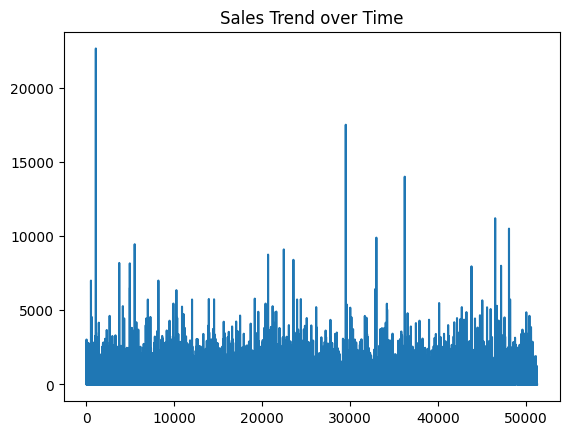

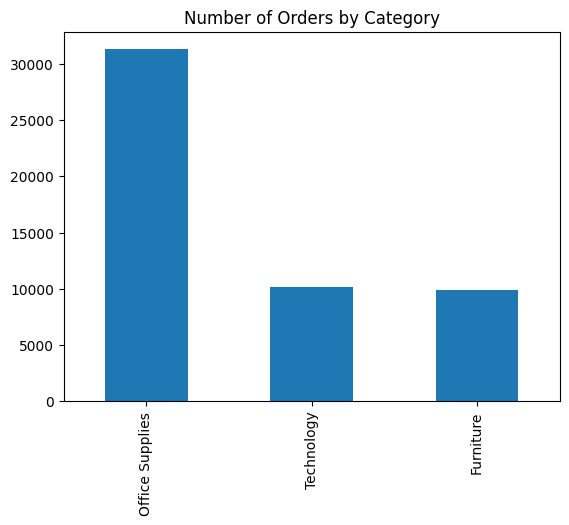

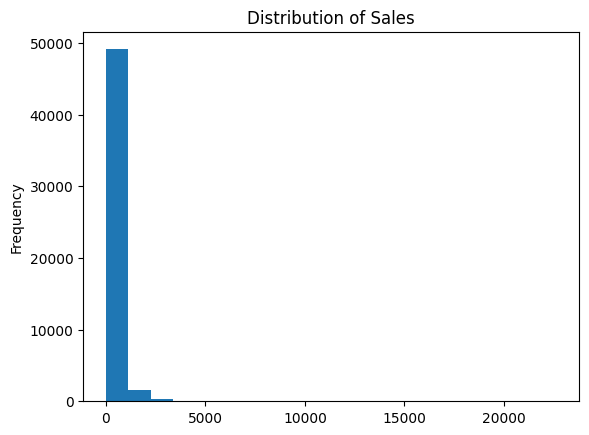

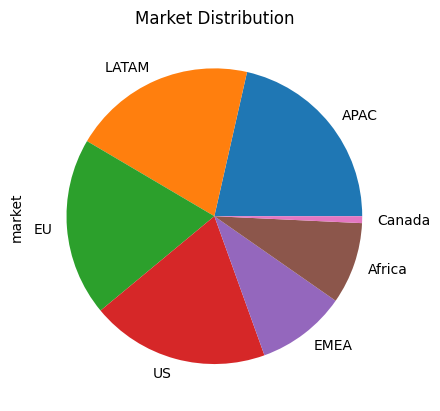

<Figure size 640x480 with 0 Axes>

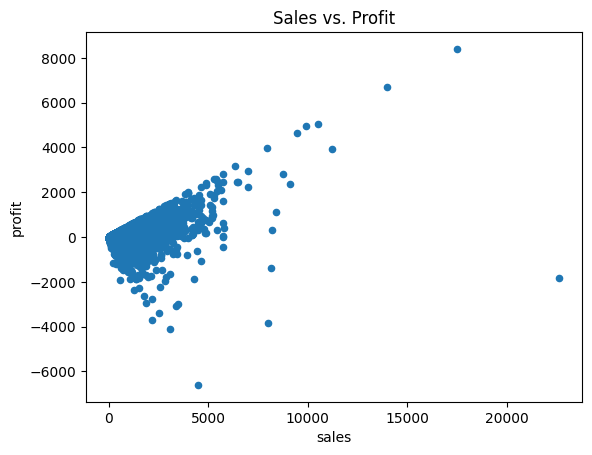

<Figure size 640x480 with 0 Axes>

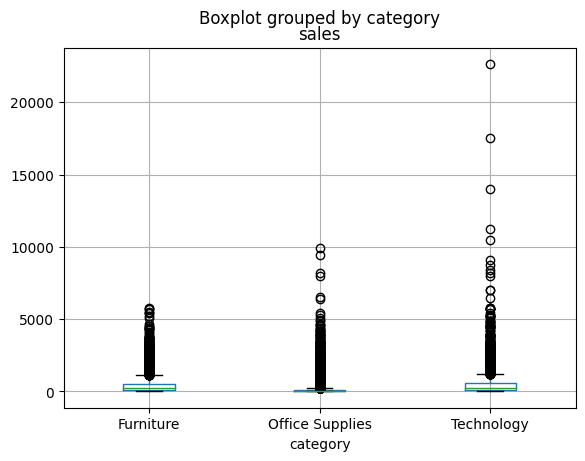

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
#df = pd.read_csv("your_file.csv")

# Display the first few rows of the DataFrame
#print(df.head())

# Now, let's demonstrate some basic charts
# Line chart
plt.figure()  # Create a new figure
df['sales'].plot(kind='line', title='Sales Trend over Time')

# Bar chart
plt.figure()  # Create a new figure
df['category'].value_counts().plot(kind='bar', title='Number of Orders by Category')

# Histogram
plt.figure()  # Create a new figure
df['sales'].plot(kind='hist', bins=20, title='Distribution of Sales')

# Pie chart
plt.figure()  # Create a new figure
df['market'].value_counts().plot(kind='pie', title='Market Distribution')

# Scatter plot
plt.figure()  # Create a new figure
df.plot(kind='scatter', x='sales', y='profit', title='Sales vs. Profit')

# Box plot
plt.figure()  # Create a new figure
df.boxplot(column='sales', by='category')

# Show the plots
plt.show()


can you please suggest some pivot tables that I can generate from this data and give me the code for that

In [21]:
import pandas as pd

# Load the CSV data into a pandas DataFrame
#df = pd.read_csv("your_file.csv")

# Pivot table: Total Sales by Year and Market
pivot_sales_year_market = df.pivot_table(index='year', columns='market', values='sales', aggfunc='sum')

# Pivot table: Average Profit by Category and Region
pivot_profit_category_region = df.pivot_table(index='category', columns='region', values='profit', aggfunc='mean')

# Pivot table: Quantity Sold by Ship Mode and Segment
pivot_quantity_shipmode_segment = df.pivot_table(index='ship_mode', columns='segment', values='quantity', aggfunc='sum')

# Pivot table: Total Sales by Sub-Category and Year
pivot_sales_subcategory_year = df.pivot_table(index='sub_category', columns='year', values='sales', aggfunc='sum')

# Display the pivot tables
print("Total Sales by Year and Market:")
print(pivot_sales_year_market)
print("\nAverage Profit by Category and Region:")
print(pivot_profit_category_region)
print("\nQuantity Sold by Ship Mode and Segment:")
print(pivot_quantity_shipmode_segment)
print("\nTotal Sales by Sub-Category and Year:")
print(pivot_sales_subcategory_year)


Total Sales by Year and Market:
market     APAC  Africa  Canada    EMEA       EU   LATAM      US
year                                                            
2011     639264  127186    8507  136422   478766  385111  484255
2012     762741  144487   16099  163406   655463  464737  470560
2013     974618  229069   19162  204654   761686  608148  608523
2014    1209210  283034   23164  301702  1042224  706691  734016

Average Profit by Category and Region:
region              Africa      Canada  Caribbean    Central  Central Asia  \
category                                                                     
Furniture        25.771926   62.220000  16.551755  26.662190    102.375967   
Office Supplies   9.353055   28.727545  15.229472  17.490588     24.396490   
Technology       48.440717  111.486462  39.676202  63.484038    122.962908   

region                EMEA       East       North  North Asia    Oceania  \
category                                                               

User
Oh I need the row and column totals as well .. also can i draw charts for these pivot tables

Total Sales by Year and Market:
market     APAC  Africa  Canada    EMEA       EU    LATAM       US       All
year                                                                        
2011     639264  127186    8507  136422   478766   385111   484255   2259511
2012     762741  144487   16099  163406   655463   464737   470560   2677493
2013     974618  229069   19162  204654   761686   608148   608523   3405860
2014    1209210  283034   23164  301702  1042224   706691   734016   4300041
All     3585833  783776   66932  806184  2938139  2164687  2297354  12642905

Average Profit by Category and Region:
region              Africa      Canada  Caribbean    Central  Central Asia  \
category                                                                     
Furniture        25.771926   62.220000  16.551755  26.662190    102.375967   
Office Supplies   9.353055   28.727545  15.229472  17.490588     24.396490   
Technology       48.440717  111.486462  39.676202  63.484038    122.962908   

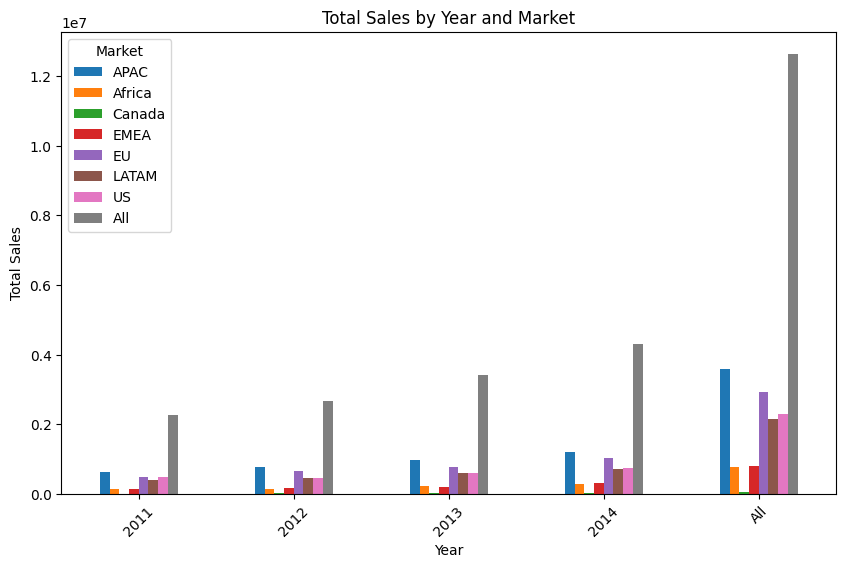

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
#df = pd.read_csv("your_file.csv")

# Pivot table: Total Sales by Year and Market with row and column totals
pivot_sales_year_market = df.pivot_table(index='year', columns='market', values='sales', aggfunc='sum', margins=True)

# Pivot table: Average Profit by Category and Region with row and column totals
pivot_profit_category_region = df.pivot_table(index='category', columns='region', values='profit', aggfunc='mean', margins=True)

# Pivot table: Quantity Sold by Ship Mode and Segment with row and column totals
pivot_quantity_shipmode_segment = df.pivot_table(index='ship_mode', columns='segment', values='quantity', aggfunc='sum', margins=True)

# Pivot table: Total Sales by Sub-Category and Year with row and column totals
pivot_sales_subcategory_year = df.pivot_table(index='sub_category', columns='year', values='sales', aggfunc='sum', margins=True)

# Display the pivot tables
print("Total Sales by Year and Market:")
print(pivot_sales_year_market)
print("\nAverage Profit by Category and Region:")
print(pivot_profit_category_region)
print("\nQuantity Sold by Ship Mode and Segment:")
print(pivot_quantity_shipmode_segment)
print("\nTotal Sales by Sub-Category and Year:")
print(pivot_sales_subcategory_year)

# Draw charts from pivot tables
# Example: Bar chart for Total Sales by Year and Market
pivot_sales_year_market.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Year and Market')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Market')
plt.show()


#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)